# Identification des utilisateurs de Copilote

## Résolution du problème

Nous vous proposons de suivre les étapes suivantes dans le traitement de cette problématique :

- Prendre connaissance du problème et des données à votre disposition
- Chargement des données brutes en mémoire
- Première analyse de ces données
- Construction de caractéristiques adaptées
- Statistiques simples sur les variables construites
- Développement d'une solution de classification automatique
- Evaluation de votre solution
- Discussion au sujet de vos résultats


## Identification des utilisateur d'un logiciel ##

La toute première étape dans le traitement des données avec Python est de les charger en mémoire pour pouvoir mieux les examiner. Plusieurs solutions s'offrent alors à vous, parmi lesquelles :

- utiliser la librairie Pandas et les méthodes qui permettent de charger directement les données dans des DataFrame comme *readcsv*,
- ouvrir le fichier texte en mode lecture (*open*) et parcourir les lignes grâce à la commande *readlines()*

Cette dernière approche semble plus robuste au regard de la régularité du fichier d'entrée. Identifiez le délimiteur qui permet de séparer les différentes actions de l'utilisateur et utilisez-le pour construire la liste des actions réalisées.

In [1]:
import pandas as pd

def read_ds(ds_name: str):
    with open(f'{ds_name}.csv') as f:
        max_actions = max(( len( str(c).split(",")) for c in f.readlines() ))
        f.seek(0)
        _names = ["util", "navigateur"] if "train" in ds_name else ["navigateur"]
        _names.extend(range(max_actions - len(_names)))
        return pd.read_csv(f, names=_names, dtype= str)

In [107]:
features_train = read_ds("train")
features_test = read_ds("test")

features_train.columns = ['util', 'navigateur', *features_train.columns[2:]]
features_test.columns = ['navigateur', *features_test.columns[1:]]
features_train.shape, features_test.shape

((3279, 14470), (324, 7726))

In [3]:
features_train.head()

,util,navigateur,0,1,2,3,4,5,6,7,...,14458,14459,14460,14461,14462,14463,14464,14465,14466,14467
0,nuh,Firefox,Création d'un écran(infologic.core.accueil.Acc...,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Création d'un écran(infologic.core.gui.control...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,muz,Google Chrome,Création d'un écran(infologic.core.gui.control...,Création d'un écran(infologic.core.gui.control...,t5,Sélection d’un onglet(infologic.orga.modules.O...,t10,Exécution d'un bouton,t15,Sélection d’un onglet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zrx,Microsoft Edge,Affichage d'une dialogue(infologic.core.gui.co...,Exécution d'un bouton,Chainage,Fermeture d'une dialogue,Affichage d'une dialogue(infologic.acti.module...,Clic sur une grille d'historique de recherche,Raccourci,Fermeture d'une dialogue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pou,Firefox,Création d'un écran(infologic.core.gui.control...,t5,Exécution d'un bouton(MAINT),Affichage d'une dialogue,Fermeture d'une dialogue,Double-clic,Exécution d'un bouton,Lancement d'une stat(infologic.core.gui.contro...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ald,Google Chrome,Affichage d'une dialogue(infologic.acti.module...,t5,Exécution d'un bouton,Fermeture d'une dialogue,t10,Entrée en saisie dans un formulaire,t10,Affichage d'une dialogue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Première analyse de ces données

Les données contiennent l'utilisateur (e.g. la variable dépendante, uniquement pour l'ensemble d'apprentissage), le navigateur choisi par l'utilisateur, puis toutes les actions effectuées dans la session par l'utilisateur actuel. Un marqueur spécial « tXX » indique un intervalle de temps de 5 secondes.

In [4]:
features_train.loc[:,:20].head()

,util,navigateur,0,1,2,3,4,5,6,7,...,11,12,13,14,15,16,17,18,19,20
0,nuh,Firefox,Création d'un écran(infologic.core.accueil.Acc...,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Création d'un écran(infologic.core.gui.control...,...,Fermeture d'une dialogue,Double-clic,Exécution d'un bouton,Lancement d'une stat(infologic.core.gui.contro...,Affichage d'un toast,Lancement d'une stat(infologic.core.gui.contro...,t10,Affichage d'une dialogue(MAINT),Exécution d'un bouton,Fermeture d'une dialogue
1,muz,Google Chrome,Création d'un écran(infologic.core.gui.control...,Création d'un écran(infologic.core.gui.control...,t5,Sélection d’un onglet(infologic.orga.modules.O...,t10,Exécution d'un bouton,t15,Sélection d’un onglet,...,Sélection d’un onglet(MAJ),t25,Sélection d'un écran(infologic.orga.modules.OR...,Sélection d'un écran,Exécution d'un bouton,Chainage,t30,Saisie dans un champ(MAINT)<DEF_03/24>1,Saisie dans un champ1,Saisie dans un champ1
2,zrx,Microsoft Edge,Affichage d'une dialogue(infologic.core.gui.co...,Exécution d'un bouton,Chainage,Fermeture d'une dialogue,Affichage d'une dialogue(infologic.acti.module...,Clic sur une grille d'historique de recherche,Raccourci,Fermeture d'une dialogue,...,Raccourci,Exécution d'un bouton,Affichage d'une dialogue,t10,Clic sur une grille d'historique de recherche,Raccourci,Exécution d'un bouton,Affichage d'une dialogue,Fermeture d'une dialogue,Clic sur une grille d'historique de recherche
3,pou,Firefox,Création d'un écran(infologic.core.gui.control...,t5,Exécution d'un bouton(MAINT),Affichage d'une dialogue,Fermeture d'une dialogue,Double-clic,Exécution d'un bouton,Lancement d'une stat(infologic.core.gui.contro...,...,Sélection d'un flag,Filtrage / Tri,t15,Affichage d'une dialogue,Clic sur une grille d'historique de recherche,Affichage d'une dialogue,t20,Exécution d'un bouton,Fermeture d'une dialogue,Création d'un écran(infologic.acti.modules.AT_...
4,ald,Google Chrome,Affichage d'une dialogue(infologic.acti.module...,t5,Exécution d'un bouton,Fermeture d'une dialogue,t10,Entrée en saisie dans un formulaire,t10,Affichage d'une dialogue,...,Sélection d'un écran(infologic.crm.modules.CRM...,Exécution d'un bouton,Action de table,Affichage d'un toast,Affichage d'une dialogue,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Exécution d'un bouton,Entrée en saisie dans un formulaire


La première observation des données montre que nous avons un nombre considérable de colonnes (14470), mais la plupart d'entre elles semblent contenir des valeurs NaN, ce qui est logique puisque pandas étend les lignes comportant moins de colonnes afin qu'elles aient toutes le même nombre de colonnes, ajoutant ainsi des valeurs NaN aux champs manquants. Quelques utilisateurs ont gardé la même session pendant une très longue durée, alors que la plupart ont des sessions plus courtes ou de durée moyenne. Ainsi, les quelques sessions longues ont entraîné l'extension de toutes les autres à leur durée. C'est de là que proviennent toutes ces valeurs NaN.

navigateur
Firefox           1466
Google Chrome     1339
Microsoft Edge     451
Opera               23
Name: count, dtype: int64

<Axes: xlabel='navigateur'>

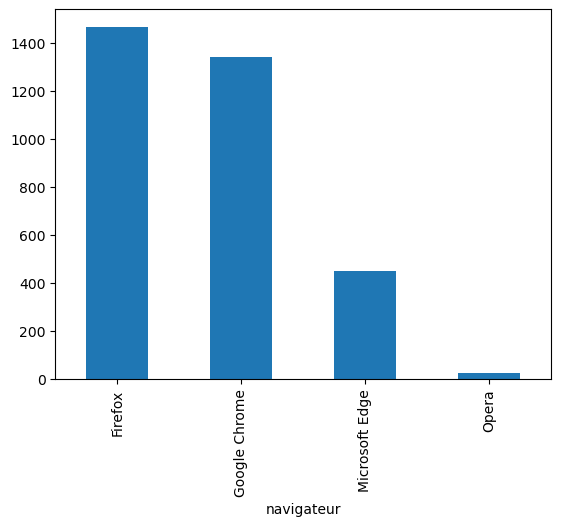

In [5]:
# Inspecter les valeurs distinctes des navigateurs
browser_values = set(features_train["navigateur"])
display(features_train['navigateur'].value_counts())
features_train['navigateur'].value_counts().plot.bar()

Quelques fonctions "utilitaires" qui pourraient vous être utiles (ou pas) :

In [7]:
import warnings
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import math as math

# décorateurs utilitaires pour supprimer les avertissements de la sortie et imprimer un cadre de données dans un tableau Markdown.
def ignore_warnings(f):
    def _f(*args, **kwargs):
        warnings.filterwarnings('ignore')
        v = f(*args, **kwargs)
        warnings.filterwarnings('default')
        return v
    return _f

# affiche un DataFrame Pandas sous forme de tableau Markdown dans un notebook Jupyter.
def markdown_table(headNtail=False, use_index=True, title=None, precision=2):
    def _get_value(val): return str(round(val, precision) if isinstance(val, float) else val)
    def _format_row(row): 
        row_str = ""
        if use_index: row_str += f"|{str(row.name)}"
        for value in row.values: row_str += f"| {_get_value(value)}"
        return row_str + "|"
    def _get_str(df):
        return "\n".join(df.apply(_format_row, axis=1))
    def _deco(f):
        def _f(*args, **kwargs):
            df = f(*args, **kwargs)
            _str = f"#### {title}\n" if title else ""
            header = ([str(df.index.name)] if use_index else []) + df.columns.astype(str).to_list() 
            _str += f"|{'|'.join(header)}|" + f"\n|{'--|'*len(header)}\n" if header else None
            if headNtail:
                _str += _get_str(df.head())
                _str += "\n|...|...|\n"
                _str += _get_str(df.tail())
            else:
                _str += _get_str(df)
            display(Markdown(_str))
        return _f
    return _deco


# Fonction utilitaire pour créer une grille d'axes
def get_grid(n, n_row=1, figsize=(16,4)):
    n_col = math.ceil(n / n_row)
    fig, axs = plt.subplots(nrows=n_row, ncols=n_col, figsize=figsize)
    # S'assurer que axs est toujours un array pour faciliter la boucle
    if n_row == 1 and n_col == 1:
        axs = [[axs]]
    elif n_row == 1:
        axs = [axs]
    elif n_col == 1:
        axs = [[ax] for ax in axs]
    return fig, axs

Maintenant que nous avons un premier aperçu de nos données, approfondissons un peu et examinons quelques statistiques à leur sujet.

In [8]:
@markdown_table(headNtail=True, title="Navigateur par utilisateur")

# TODO: Inspecter les navigateurs
def browsers_per_player(df) :
    return(pd.crosstab(df["util"], df["navigateur"]))

browsers_per_player(features_train)

#### Navigateur par utilisateur
|util|Firefox|Google Chrome|Microsoft Edge|Opera|
|--|--|--|--|--|
|aho| 0| 10| 0| 0|
|ajo| 13| 0| 0| 0|
|akx| 0| 14| 0| 0|
|ald| 0| 15| 0| 0|
|ats| 12| 0| 0| 0|
|...|...|
|zqs| 0| 0| 16| 0|
|zro| 13| 0| 0| 0|
|zrx| 0| 0| 12| 0|
|zus| 13| 0| 0| 0|
|zyk| 0| 21| 0| 0|

    util  nb_sessions
0    skm           75
1    slq           71
2    cjr           46
3    flj           42
4    hjs           37
..   ...          ...
242  rff            4
243  bez            4
244  crn            4
245  azn            4
246  fyg            4

[247 rows x 2 columns]


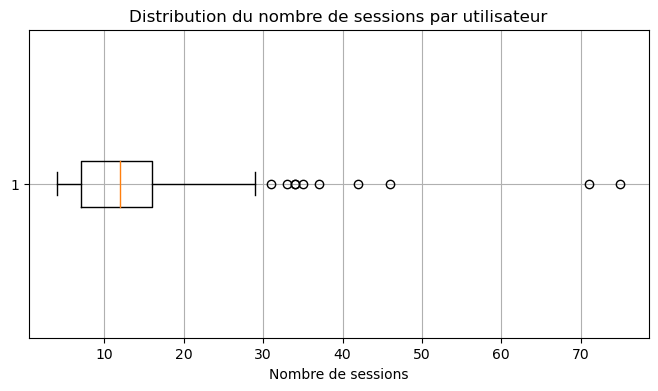

In [9]:
def get_Y_stats(df):
    distribution_util = (
        df["util"]
        .value_counts()
        .reset_index()
        .rename(columns={"count": "nb_sessions"})
    )
    return distribution_util

distribution_util = get_Y_stats(features_train)
print(distribution_util)

plt.figure(figsize=(8,4))
plt.boxplot(distribution_util["nb_sessions"].apply(int), vert=False)
plt.title("Distribution du nombre de sessions par utilisateur")
plt.xlabel("Nombre de sessions")
plt.grid()
plt.show()

## Construction de caractéristiques

### Traitements préliminaires

En fonction du modèle choisi, différentes étapes de pré-traitement peuvent être nécessaire. Voir https://scikit-learn.org/stable/supervised_learning.html pour des exemples de modèles dans le cas supervisé (notre cas). Quelques exemples : 
- SVMs
- Régression logistiques
- Arbres de décision
- Modèle ensembliste (Random Forest, XGBoost, etc.)
- Réseaux de neurones 

Il faut commencer par se demander s'il y a des valeurs aberrantes (*outliers*) et, le cas échéant, appliquer le traitement approprié (pour le moment vous pouvez à priori les supprimer).

7.0 16.0
    niveau_activité  count       mean  min  max
0  Activité moyenne    136  11.301471    7   15
1   Faible activité     47   5.085106    4    6
2    Forte activité     64  23.484375   16   75


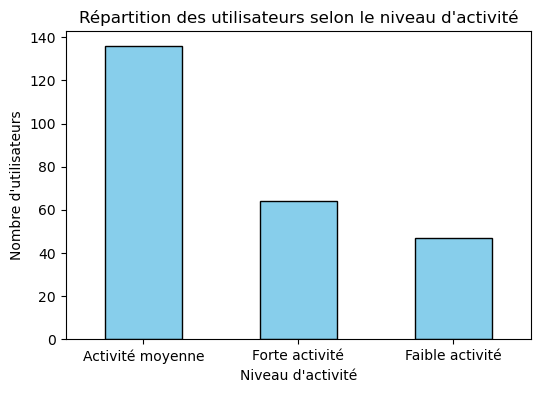

In [10]:
Q1 = distribution_util["nb_sessions"].quantile(0.25)
Q3 = distribution_util["nb_sessions"].quantile(0.75)
print (Q1, Q3)

def categorize_sessions(x):
    if x < Q1:
        return "Faible activité"
    elif x < Q3:
        return "Activité moyenne"
    else:
        return "Forte activité"

distribution_util["niveau_activité"] = distribution_util["nb_sessions"].apply(categorize_sessions)

stats = distribution_util.groupby("niveau_activité")["nb_sessions"].agg(["count", "mean", "min", "max"]).reset_index()
print(stats)

plt.figure(figsize=(6,4))
distribution_util["niveau_activité"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Répartition des utilisateurs selon le niveau d'activité")
plt.xlabel("Niveau d'activité")
plt.ylabel("Nombre d'utilisateurs")
plt.xticks(rotation=0)
plt.show()

### Variable de classe
Notre variable dépendante est une chaîne de caractères (str). Nous pouvons la convertir en codes catégoriels (numériques) à l'aide de la fonction pd.Categorical.

In [11]:
features_train["util"] = pd.Categorical(features_train["util"])

pd.Categorical ne modifie pas directement l'ID utilisateur en un nombre, mais lui ajoute un attribut cat.codes. Nous pouvons créer une petite fonction pour convertir la variable de classe d'une chaîne de caractères en son ID de catégorie :

In [12]:
def to_categories(df, col="util"):
    df[[col]] = df[[col]].apply(lambda x: x.cat.codes)

### Obtention des caractéristiques...

Nous allons maintenant créer des caractéristiques à partir de l'ensemble de données. Pour cela, il va falloir comprendre leur format, les parser et voir comment les agréger.

On commence par créer un nouveau DataFrame qu'on remplira avec les features qui seront utilisés pour traiter le modèle. Les premiers features qu'on ajoute sont bien sûr l'identifiant de l'utilisateur et le navigateur utilisé, qui peuvent être extraits directement des premières colonnes du DataFrame.

In [13]:
features_train_model = features_train[["util", "navigateur"]]

Premier feature qu'on utilise : le temps total que mets l'utisateur dans sa session :

In [14]:
import re as re

def temps_total_session(session) : 
    for action in session : 
        if isinstance(action, str) and action.startswith("t") : 
            temps = action 
    return int(temps[1:]) 

features_train_model["temps total"] = features_train.iloc[:, 2:].apply(temps_total_session, axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11124\1292257044.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_model["temps total"] = features_train.iloc[:, 2:].apply(temps_total_session, axis=1)


In [15]:
features_train_model.head()

,util,navigateur,temps total
0,nuh,Firefox,2905
1,muz,Google Chrome,230
2,zrx,Microsoft Edge,750
3,pou,Firefox,1445
4,ald,Google Chrome,275


Nous allons maintenant créer des caractéristiques à partir de l'ensemble de données. Pour cela, il va falloir comprendre leur format, les parser et voir comment les agréger. On peut commencer par inspecter toutes les actions différentes.

In [16]:
# Actions uniques
features_train.iloc[:,2:].stack().unique()
uniques = list(set([un for un in features_train.iloc[:,2:].stack().unique() if not un.startswith("t")]))
len(uniques), uniques

(7087,
 ['Saisie dans un champ(fr.infologic.compta.client.modules.remise.SaisieRemManuelleForm)',
  'Sélection d’un onglet(PARAM)$TEC$',
  "Affichage d'une dialogue(infologic.core.gui.controllers.BlankController)<ACCUEIL_27001>",
  'Chainage(BUG)<DEF_07/23>$ST$',
  'Sélection d’un onglet(MAINT)$VALWF$',
  'Sélection d’un onglet(infologic.acti.modules.AT_ACTIVITES.ficheactivite.ActiFicheActiviteController)<STD>',
  "Désélection d'un élément(infologic.orga.modules.OR_ANALYSE.modele.action.AnalyseTachesController)",
  "Fermeture d'un panel<001>",
  'Saisie dans un champ(fr.infologic.achats.client.modules.editions.ReeditReceptForm)',
  'Chainage(infologic.core.gui.controllers.BlankController)<WEB_SuiviDevs>',
  'Chainage(DOC)',
  "Affichage d'une dialogue(infologic.core.commun.DocumentController)",
  'Retour sur un écran$GMAO$',
  'Sélection d’un onglet<TOUR_TABLE_TOULOUSE>',
  'Chainage(BUG)<DEF_07/23>$ORGA$',
  'Saisie dans un champ(fr.infologic.ventes.client.modules.tarification.tarbase

In [17]:
def filter_action(value: str):
    if isinstance(value, str) :
        for delim in [ "(", "<", "$", "1"]:
            if delim in value and (low_ind := value.index(delim)):
                value = value[:low_ind]
    return value

# filtration des actions:
filtered_uniques = list(set([filter_action(un) for un in uniques]))
len(filtered_uniques), filtered_uniques

(35,
 ['Clic sur une checkbox',
  "Affichage d'une erreur",
  'Filtrage / Tri',
  "Création d'un écran",
  "Sélection d'un écran",
  "Fermeture d'une dialogue",
  'Double-clic',
  "Clic sur une grille d'historique de recherche",
  "Sélection d'un élément",
  "Affichage d'une arborescence",
  'Entrée en saisie dans un formulaire',
  "Désélection d'un flag",
  'Saisie dans un champ',
  'Clic long',
  "Dissimulation d'une arborescence",
  'Raccourci',
  'Action de table',
  "Désélection d'un élément",
  "Démarrage serveur d'application Tomcat",
  'Sélection d’un onglet',
  'Retour sur un écran',
  'Fermeture de session',
  "Lancement d'une action infocentre",
  "Sélection d'un flag",
  "Fermeture d'un panel",
  'Erreur système grave',
  'Chainage',
  "Affichage d'un toast",
  "Exécution d'un bouton",
  "Lancement d'une stat",
  "Ouverture d'un panel",
  "Lancement d'un tableau de bord",
  "Lancement d'une action générique",
  "Raccourci dans l'édition de table",
  "Affichage d'une dialogu

Ces actions seront ajoutées comme features au DataFrame qu'on vient de créer pour comprendre le comportement des utilisateurs. Un autre feature qu'on ajoute, c'est le nombre d'opérations effectuées par session.

In [18]:
import numpy as np

# Nettoyer des colonnes d'actions et éliminer les 'txxxx'
df_filtered = features_train.copy()
df_filtered.iloc[:, 2:] = features_train.iloc[:, 2:].applymap(filter_action)
df_filtered = df_filtered.replace(to_replace=r"^t\d*$", value=np.nan, regex=True)
df_filtered.head()

,util,navigateur,0,1,2,3,4,5,6,7,...,14458,14459,14460,14461,14462,14463,14464,14465,14466,14467
0,nuh,Firefox,Création d'un écran,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Création d'un écran,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,muz,Google Chrome,Création d'un écran,Création d'un écran,NaN,Sélection d’un onglet,NaN,Exécution d'un bouton,NaN,Sélection d’un onglet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zrx,Microsoft Edge,Affichage d'une dialogue,Exécution d'un bouton,Chainage,Fermeture d'une dialogue,Affichage d'une dialogue,Clic sur une grille d'historique de recherche,Raccourci,Fermeture d'une dialogue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pou,Firefox,Création d'un écran,NaN,Exécution d'un bouton,Affichage d'une dialogue,Fermeture d'une dialogue,Double-clic,Exécution d'un bouton,Lancement d'une stat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ald,Google Chrome,Affichage d'une dialogue,NaN,Exécution d'un bouton,Fermeture d'une dialogue,NaN,Entrée en saisie dans un formulaire,NaN,Affichage d'une dialogue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Construction du DataFrame des features (comptage des actions)
def build_features(df, filtered_uniques):
    features_list = []
    for idx, row in df.iterrows():
        counts = {action: 0 for action in filtered_uniques}
        for action in row:
            if action in counts:
                counts[action] += 1
        features_list.append(counts)
    features_actions = pd.DataFrame(features_list)
    return features_actions.fillna(0)

features_actions = build_features(df_filtered, filtered_uniques)

# Ajouter les colonnes de base (util, navigateur, etc.)
features_train_model = pd.concat([features_train_model.reset_index(drop=True),
                              features_actions.reset_index(drop=True)], axis=1)

# Calcul du nombre total d'opérations
features_train_model['num_ops'] = features_train_model[filtered_uniques].sum(axis=1)


features_train_model.head()

,util,navigateur,temps total,Clic sur une checkbox,Affichage d'une erreur,Filtrage / Tri,Création d'un écran,Sélection d'un écran,Fermeture d'une dialogue,Double-clic,...,Chainage,Affichage d'un toast,Exécution d'un bouton,Lancement d'une stat,Ouverture d'un panel,Lancement d'un tableau de bord,Lancement d'une action générique,Raccourci dans l'édition de table,Affichage d'une dialogue,num_ops
0,nuh,Firefox,2905,0,6,161,72,23,369,87,...,8,311,698,85,0,0,124,0,350,2514
1,muz,Google Chrome,230,0,0,0,3,3,2,0,...,3,1,33,0,0,0,5,0,2,90
2,zrx,Microsoft Edge,750,0,0,1,36,68,38,22,...,32,7,122,0,1,0,35,0,35,608
3,pou,Firefox,1445,0,1,5,22,50,42,2,...,23,2,279,101,0,0,26,0,42,886
4,ald,Google Chrome,275,0,0,0,10,19,10,2,...,4,1,60,0,0,0,7,0,10,173


Ensuite, on peut employer des fonctions plus complexes pour extraire l'écran le plus utilisé, la configuration d'écran la plus utilisé et la chaîne (catégorie) de la fiche la plus utilisé. Pour vous aider, voici les expressions régulières (*regex*) qui permettent d'extraire de telles informations. N'hésitez pas à extraire d'autres informations si cela vous parait pertinent.

In [21]:
features_train_model.head()

,util,navigateur,temps total,Clic sur une checkbox,Affichage d'une erreur,Filtrage / Tri,Création d'un écran,Sélection d'un écran,Fermeture d'une dialogue,Double-clic,...,Chainage,Affichage d'un toast,Exécution d'un bouton,Lancement d'une stat,Ouverture d'un panel,Lancement d'un tableau de bord,Lancement d'une action générique,Raccourci dans l'édition de table,Affichage d'une dialogue,num_ops
0,nuh,Firefox,2905,0,6,161,72,23,369,87,...,8,311,698,85,0,0,124,0,350,2514
1,muz,Google Chrome,230,0,0,0,3,3,2,0,...,3,1,33,0,0,0,5,0,2,90
2,zrx,Microsoft Edge,750,0,0,1,36,68,38,22,...,32,7,122,0,1,0,35,0,35,608
3,pou,Firefox,1445,0,1,5,22,50,42,2,...,23,2,279,101,0,0,26,0,42,886
4,ald,Google Chrome,275,0,0,0,10,19,10,2,...,4,1,60,0,0,0,7,0,10,173


In [22]:
def first_operation(row):
    return filter_action(row.iloc[0])

def last_operation(row):
    non_na = row.dropna()
    return filter_action(non_na.iloc[-1]) if not non_na.empty else np.nan

features_train_model['first_op'] = features_train.iloc[:, 2:].apply(first_operation, axis=1)
features_train_model['last_op'] = features_train.iloc[:, 2:].apply(last_operation, axis=1)

In [23]:
features_train_model.head()

,util,navigateur,temps total,Clic sur une checkbox,Affichage d'une erreur,Filtrage / Tri,Création d'un écran,Sélection d'un écran,Fermeture d'une dialogue,Double-clic,...,Exécution d'un bouton,Lancement d'une stat,Ouverture d'un panel,Lancement d'un tableau de bord,Lancement d'une action générique,Raccourci dans l'édition de table,Affichage d'une dialogue,num_ops,first_op,last_op
0,nuh,Firefox,2905,0,6,161,72,23,369,87,...,698,85,0,0,124,0,350,2514,Création d'un écran,Fermeture de session
1,muz,Google Chrome,230,0,0,0,3,3,2,0,...,33,0,0,0,5,0,2,90,Création d'un écran,Fermeture d'une dialogue
2,zrx,Microsoft Edge,750,0,0,1,36,68,38,22,...,122,0,1,0,35,0,35,608,Affichage d'une dialogue,Lancement d'une action générique
3,pou,Firefox,1445,0,1,5,22,50,42,2,...,279,101,0,0,26,0,42,886,Création d'un écran,Fermeture de session
4,ald,Google Chrome,275,0,0,0,10,19,10,2,...,60,0,0,0,7,0,10,173,Affichage d'une dialogue,Fermeture de session


Maintenant on passe à définir des features séquentielles qui permettent de comprendre la logique de fonctionnement de l'utilisateur, d'abord, on extrait les actions qu'il fait en ordre.

In [24]:
action_cols = df_filtered.columns[2:]

# Fonction pour créer la séquence
def get_action_sequence(row):
    return [str(act) for act in row[action_cols] if pd.notna(act)]

# Nouvelle colonne sequence
df_filtered['action_sequence'] = df_filtered.apply(get_action_sequence, axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11124\426250939.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_filtered['action_sequence'] = df_filtered.apply(get_action_sequence, axis=1)


In [25]:
df_filtered['action_sequence'][0]

["Création d'un écran",
 "Affichage d'une dialogue",
 "Exécution d'un bouton",
 "Fermeture d'une dialogue",
 "Affichage d'une dialogue",
 "Exécution d'un bouton",
 "Fermeture d'une dialogue",
 "Création d'un écran",
 "Exécution d'un bouton",
 "Affichage d'une dialogue",
 "Fermeture d'une dialogue",
 'Double-clic',
 "Exécution d'un bouton",
 "Lancement d'une stat",
 "Affichage d'un toast",
 "Lancement d'une stat",
 "Affichage d'une dialogue",
 "Exécution d'un bouton",
 "Fermeture d'une dialogue",
 'Double-clic',
 "Lancement d'une action générique",
 "Affichage d'une dialogue",
 "Affichage d'un toast",
 'Filtrage / Tri',
 "Exécution d'un bouton",
 "Fermeture d'une dialogue",
 "Création d'un écran",
 "Exécution d'un bouton",
 "Lancement d'une action générique",
 "Exécution d'un bouton",
 "Affichage d'une dialogue",
 'Saisie dans un champ',
 "Exécution d'un bouton",
 "Fermeture d'une dialogue",
 "Affichage d'une dialogue",
 "Exécution d'un bouton",
 "Fermeture d'une dialogue",
 "Affichage 

Un autre feature : la séquentialisation des opérations :

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from itertools import pairwise
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF sur les séquences entières (actions comme tokens)
df_filtered['action_sequence_str'] = df_filtered['action_sequence'].apply(lambda x: " | ".join(x))
tfidf = TfidfVectorizer(tokenizer=lambda s: s.split(" | "), lowercase=False)
X_tfidf = tfidf.fit_transform(df_filtered['action_sequence_str'])
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=[f"tfidf_{w}" 
                                    for w in tfidf.get_feature_names_out()])

# Bigrammes (transitions entre actions)
def extract_bigrams(actions):
    return [" → ".join(pair) for pair in pairwise(actions)] if len(actions) > 1 else []

df_filtered['action_bigrams'] = df_filtered['action_sequence'].apply(extract_bigrams)
df_filtered['action_bigrams_str'] = df_filtered['action_bigrams'].apply(lambda x: " | ".join(x))

bigram_vectorizer = TfidfVectorizer(tokenizer=lambda s: s.split(" | "), lowercase=False)
X_bigram = bigram_vectorizer.fit_transform(df_filtered['action_bigrams_str'])
df_bigram = pd.DataFrame(X_bigram.toarray(), columns=[f"trans_{w}" 
                                    for w in bigram_vectorizer.get_feature_names_out()])


# Fusion avec features_train_model
features_train_model = pd.concat([features_train_model,
    df_bigram.reset_index(drop=True)
], axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11124\3133946030.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_filtered['action_sequence_str'] = df_filtered['action_sequence'].apply(lambda x: " | ".join(x))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11124\3133946030.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_filtered['a

In [27]:
print(features_train_model.columns)

Index(['util', 'navigateur', 'temps total', 'Clic sur une checkbox',
       'Affichage d'une erreur', 'Filtrage / Tri', 'Création d'un écran',
       'Sélection d'un écran', 'Fermeture d'une dialogue', 'Double-clic',
       ...
       'trans_Sélection d’un onglet → Lancement d'une action infocentre',
       'trans_Sélection d’un onglet → Lancement d'une stat',
       'trans_Sélection d’un onglet → Ouverture d'un panel',
       'trans_Sélection d’un onglet → Raccourci',
       'trans_Sélection d’un onglet → Retour sur un écran',
       'trans_Sélection d’un onglet → Saisie dans un champ',
       'trans_Sélection d’un onglet → Sélection d'un flag',
       'trans_Sélection d’un onglet → Sélection d'un écran',
       'trans_Sélection d’un onglet → Sélection d'un élément',
       'trans_Sélection d’un onglet → Sélection d’un onglet'],
      dtype='object', length=1010)


### Traitement des chaînes de caractère
La colonne navigateur ne peut prendre que quatre valeurs ; pour la convertir en nombre, on a deux choix : 
- la convertir en variable catégorielle comme nous l'avons fait avec notre variable dépendante
- la convertir en One-Hot Encoding (OHE), un pour chaque navigateur. Pandas propose également une fonction pour cela : get_dummies

En fonction du modèle, l'un ou l'autre peut être plus pertinent (par exemple, pour un arbre de décision ?).
On utilise la conversion en variable catégorielle pour toutes les features ayant une valeur *string*. On fait ce choix parce qu'il permet de conserver le même nombre d'attributs, ce qui permettra une meilleure visualisation de la corrélation et évitra des tableau avec beaucoup de colonnes.

In [28]:
features_train_model["util"] = pd.Categorical(features_train_model["util"])
util_categories = features_train_model["util"].cat.categories

def to_categories(df, col):
    df[[col]] = df[[col]].apply(lambda x: x.cat.codes)

to_categories(features_train_model, col = 'util')

print(util_categories)

Index(['aho', 'ajo', 'akx', 'ald', 'ats', 'avt', 'azn', 'azo', 'azx', 'bez',
       ...
       'zbn', 'zct', 'zht', 'zll', 'zok', 'zqs', 'zro', 'zrx', 'zus', 'zyk'],
      dtype='object', length=247)


In [29]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ["navigateur", "first_op", "last_op"]

encoders = {}
for col in cols_to_encode:
    le = LabelEncoder()
    features_train_model[col] = le.fit_transform(features_train_model[col].astype(str))
    encoders[col] = le 

In [30]:
features_train_model.head()

,util,navigateur,temps total,Clic sur une checkbox,Affichage d'une erreur,Filtrage / Tri,Création d'un écran,Sélection d'un écran,Fermeture d'une dialogue,Double-clic,...,trans_Sélection d’un onglet → Lancement d'une action infocentre,trans_Sélection d’un onglet → Lancement d'une stat,trans_Sélection d’un onglet → Ouverture d'un panel,trans_Sélection d’un onglet → Raccourci,trans_Sélection d’un onglet → Retour sur un écran,trans_Sélection d’un onglet → Saisie dans un champ,trans_Sélection d’un onglet → Sélection d'un flag,trans_Sélection d’un onglet → Sélection d'un écran,trans_Sélection d’un onglet → Sélection d'un élément,trans_Sélection d’un onglet → Sélection d’un onglet
0,130,0,2905,0,6,161,72,23,369,87,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.003212
1,118,1,230,0,0,0,3,3,2,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.054657,0.0,0.000000
2,244,2,750,0,0,1,36,68,38,22,...,0.0,0.0,0.0,0.015082,0.0,0.0,0.0,0.019508,0.0,0.039441
3,146,0,1445,0,1,5,22,50,42,2,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
4,3,1,275,0,0,0,10,19,10,2,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


## Statistiques simples sur les variables

### Inspection des caractéristiques

Commencez par inspecter les caractéristiques que vous avez construites, et afficher des graphiques en les interprétant. Vous pouvez utiliser la librairie Matplotlib à cette fin.

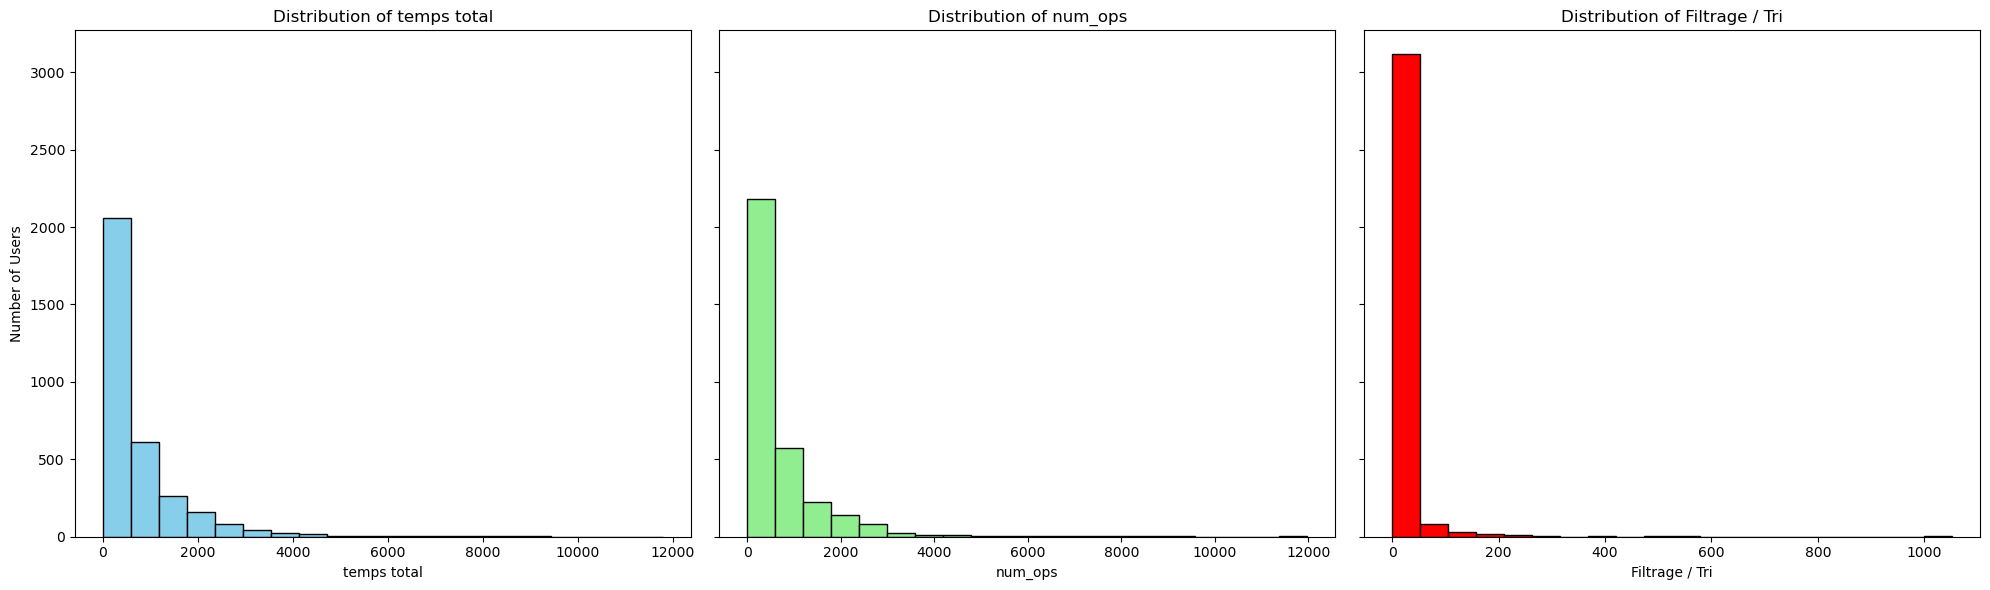

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20,6))

feature1 = "temps total"
feature2 = "num_ops"
feature3 = "Filtrage / Tri"

# Feature 1
ax1.hist(features_train_model[feature1], bins=20, color='skyblue', edgecolor='black')
ax1.set_title(f'Distribution of {feature1}')
ax1.set_xlabel(feature1)
ax1.set_ylabel('Number of Users')

# Feature 2
ax2.hist(features_train_model[feature2], bins=20, color='lightgreen', edgecolor='black')
ax2.set_title(f'Distribution of {feature2}')
ax2.set_xlabel(feature2)

# Feature 3
ax3.hist(features_train_model[feature3], bins=20, color='red', edgecolor='black')
ax3.set_title(f'Distribution of {feature3}')
ax3.set_xlabel(feature3)

plt.tight_layout()
plt.show()

### Inspection de la corrélation d'une caractéristique pour une classe particulière
Comme il peut être difficile d'inspecter les données lorsque nous avons un tel nombre de classes possibles, nous pouvons commencer par tracer des graphiques de corrélation pour une ou quelques cibles particulières, choisies arbitrairement.


In [32]:
import seaborn as sns

# Fonction pour tracer la distribution d'une feature pour certaines catégories
def plot_categories(categories, type_="box", feature="actions_means"):
    fig, axs = get_grid(len(categories), n_row=1, figsize=(16, 4))
    axs = axs[0]  # on prend la première ligne d'axes

    for i, cat in enumerate(categories):
        data_cat = features_train_model[features_train_model["util"]==cat]
        if type_ == "box":
            sns.boxplot(y=data_cat[feature], ax=axs[i], color='skyblue')
        elif type_ == "violin":
            sns.violinplot(y=data_cat[feature], ax=axs[i], color='lightgreen')
        axs[i].set_title(f"Catégorie {cat}")
        axs[i].set_ylabel(feature)
        axs[i].set_xlabel("")
    
    plt.suptitle(f"Distribution de '{feature}' pour certaines catégories", fontsize=16)
    plt.tight_layout()
    plt.show()

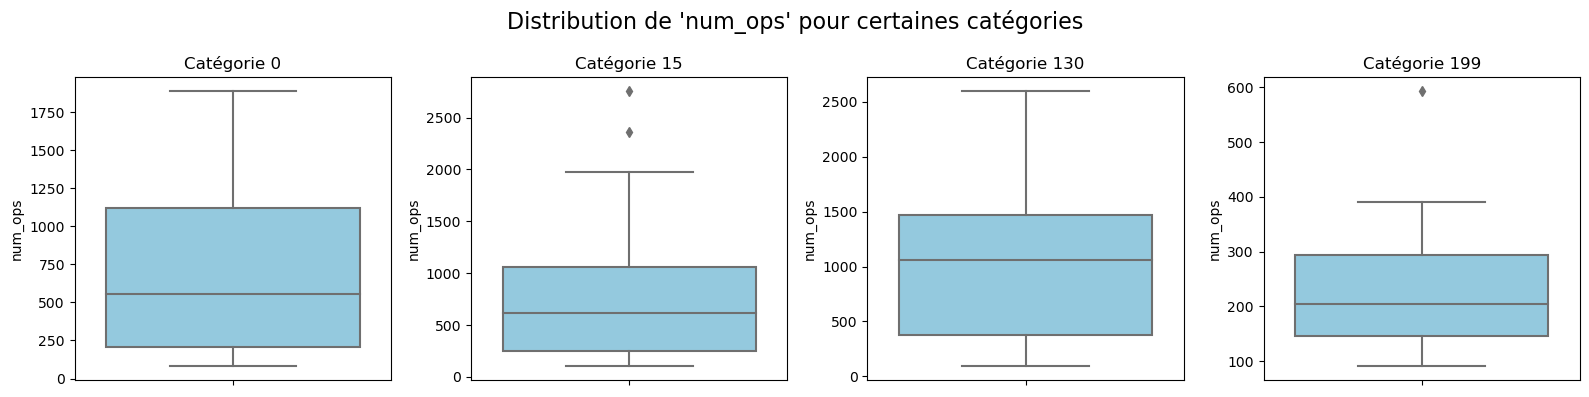

In [33]:
categories = [0, 15, 130, 199]
plot_categories(categories, type_="box", feature="num_ops")

Un boxplot est très utile pour estimer la distribution d'une caractéristique au sein d'une catégorie (cf. cours), mais d'autres visualisations peuvent servir comme les violin plots.



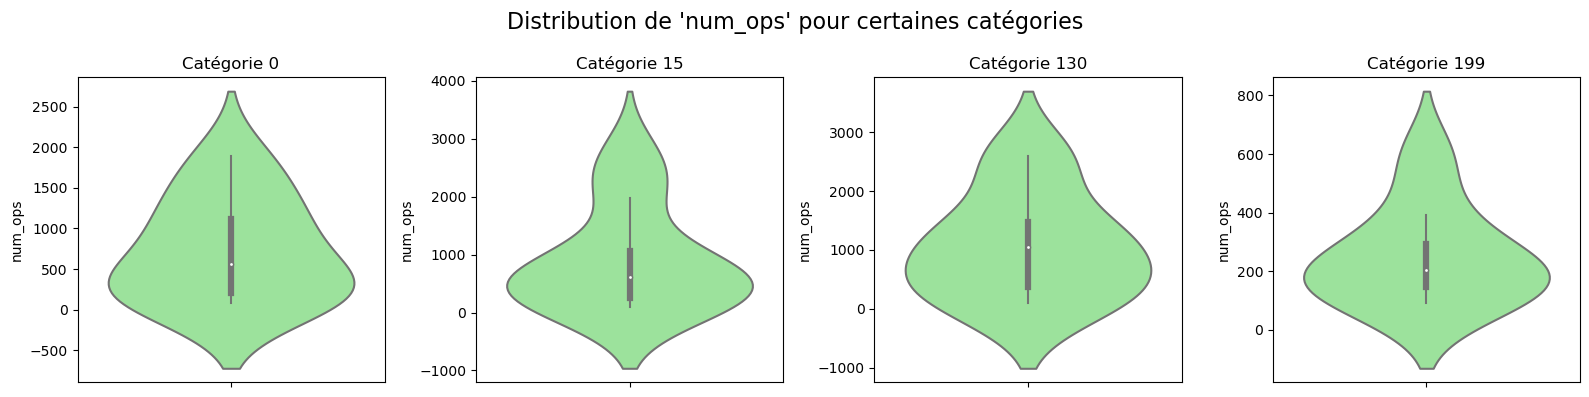

In [34]:
categories = [0, 15, 130, 199]
plot_categories(categories, type_="violin", feature="num_ops")

Evaluation de la corrélation entre les features :

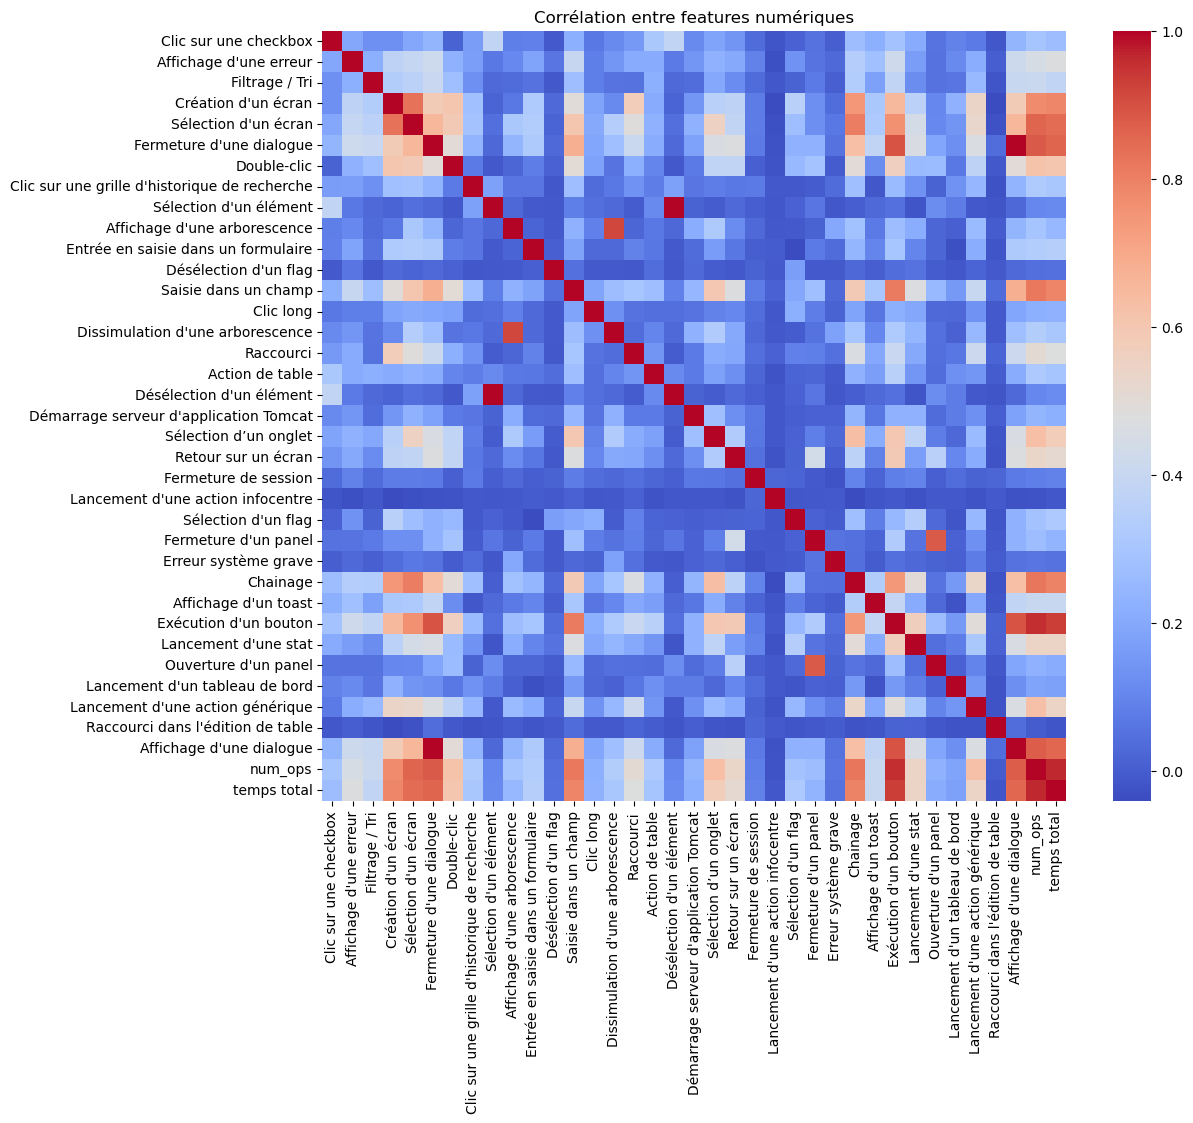

In [35]:
# Sélection des colonnes numériques
numeric_features = features_train_model[filtered_uniques + ['num_ops', 'temps total']]

# Calcul de la matrice de corrélation
corr_matrix = numeric_features.corr(method='pearson')

# Affichage avec un heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title("Corrélation entre features numériques")
plt.show()

La visualisation de la matrice de corrélation, on comprend qu'il y a un nombre de features à éliminer car ils présentent une haute corrélation avec d'autres features :

- Désélection d'un élément

- Fermeture d'une dialogue

- nombre d'opérations par session 

In [36]:
features_train_model= features_train_model.drop(columns=["Désélection d'un élément",
"Fermeture d'une dialogue", 'num_ops'])

In [37]:
features_train_model.head()

,util,navigateur,temps total,Clic sur une checkbox,Affichage d'une erreur,Filtrage / Tri,Création d'un écran,Sélection d'un écran,Double-clic,Clic sur une grille d'historique de recherche,...,trans_Sélection d’un onglet → Lancement d'une action infocentre,trans_Sélection d’un onglet → Lancement d'une stat,trans_Sélection d’un onglet → Ouverture d'un panel,trans_Sélection d’un onglet → Raccourci,trans_Sélection d’un onglet → Retour sur un écran,trans_Sélection d’un onglet → Saisie dans un champ,trans_Sélection d’un onglet → Sélection d'un flag,trans_Sélection d’un onglet → Sélection d'un écran,trans_Sélection d’un onglet → Sélection d'un élément,trans_Sélection d’un onglet → Sélection d’un onglet
0,130,0,2905,0,6,161,72,23,87,1,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.003212
1,118,1,230,0,0,0,3,3,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.054657,0.0,0.000000
2,244,2,750,0,0,1,36,68,22,72,...,0.0,0.0,0.0,0.015082,0.0,0.0,0.0,0.019508,0.0,0.039441
3,146,0,1445,0,1,5,22,50,2,121,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
4,3,1,275,0,0,0,10,19,2,10,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


## Développement d'une solution de classification automatique

Une fois que vous avez exploré les données et mieux compris comment résoudre la tâche qui vous est confiée, c'est le moment de commencer à développer votre solution de classification automatique supervisée.

La première opération consiste à séparer votre jeu de données en deux sous-ensembles : un jeu d'entraînement (**training set**) et un jeu de validation (**validation set**). Le jeu de validation vous aidera dans la sélection du meilleur modèle. Suivant les algorithmes employés, et leur coût computationnel, vous pourriez aussi avoir recours à la validation croisée à K-folds (*K-fold cross validation*).

In [38]:
from sklearn.model_selection import train_test_split

X = features_train_model.drop(columns=['util', 'navigateur'], errors='ignore')
y = features_train_model["util"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Il s'agit ensuite de tester plusieurs algorithmes classiques et de faire varier ses hyper-paramètres, tel que :

- Régression logistique
- Machines à vecteurs supports (SVM) : différents types de noyau (linéaire, polynomial à différents degrés)
- Arbres de décisions simples
- Ensembles d'arbres (Random Forest, XGBoost) : nombre d'arbres
- Réseaux de neurones artificiels (simple MLP) : nombre de couches, nombre de neurones par couche

Vous pouvez également tester les méthodes de régularisation afin d'obtenir des modèles parcimonieux.

Pour cela, vous privilégierez l'usage de la librairie *scikit-learn*.

## Evaluation de votre solution

Les algorithmes déployés dans la section précédente permettent de réaliser des prédictions sur des données qui n'ont pas été vus durant l'entraînement. Dans le cadre de cette compétition, vous utiliserez pour ça un ensemble de validation.

Il s'agit à présent de définir convenablement et d'utiliser les métriques les plus appropriées à votre tâche. On vous conseille à minima d'employer la **réussite simple** en classification (*accuracy*) et la **F-Mesure** (ou F1-score) mais vous êtes aussi encouragés à utiliser d'autres manière d'évaluer l'efficacité d'un modèle.

On procède à une régularisation via *StandardScaler* 

Premier modèle testé : RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score


rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
 n_jobs=-1
)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_val)
f1 = f1_score(y_val, y_pred, average='macro')

print(f"\nF1-score macro : {f1:.4f}")


F1-score macro : 0.7458


In [40]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
 n_jobs=-1
)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_val)
f1 = f1_score(y_val, y_pred, average='macro')

print(f"\nF1-score macro : {f1:.4f}")


F1-score macro : 0.7298


Validation croisée :

In [41]:
from sklearn.model_selection import cross_val_score, KFold

# --- Définir le modèle ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# --- Définir K-folds ---
k = 3  # nombre de folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # shuffle pour mélanger les données

# --- Validation croisée ---
scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

# --- Résultats ---
print(f"Scores sur chaque fold : {scores}")
print(f"Précision moyenne : {np.mean(scores):.4f}")

Scores sur chaque fold : [0.77035682 0.76395242 0.75388838]
Précision moyenne : 0.7627


Deuxième modèle testé : Linear SVC

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(
    kernel='linear',
    C=7.0,
    class_weight='balanced',  
    random_state=200
)

svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_val)

print("F1-score (macro):", f1_score(y_val, y_pred, average='macro'))

F1-score (macro): 0.36827658726920454


In [ ]:
svm_clf = SVC(
    kernel='poly',
    C=13.0,
    class_weight='balanced',  
    random_state=200
)

svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_val)

print("F1-score (macro):", f1_score(y_val, y_pred, average='macro'))

F1-score (macro): 0.12341576552102868


In [ ]:
svm_clf = SVC(
    kernel='rbf',
    C = 13.0,
    class_weight='balanced',  
    random_state=200
)

svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_val)

print("F1-score (macro):", f1_score(y_val, y_pred, average='macro'))

F1-score (macro): 0.18834389438104607


Troisième modèle testé : Régression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(
    multi_class='multinomial',  
    solver='lbfgs',             
    max_iter=1000,              
    random_state=42,
    n_jobs=-1
)

log_clf.fit(X_train, y_train)

y_pred = log_clf.predict(X_val)

f1 = f1_score(y_val, y_pred, average='macro')
print(f"\nF1-score macro (Régression Logistique) : {f1:.4f}")


F1-score macro (Régression Logistique) : 0.5820


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation='relu',
    solver='adam',
    batch_size=64,
    max_iter=200,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=42,
    verbose=True
)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_val)

f1 = f1_score(y_val, y_pred, average='macro')
print(f"\nF1-score macro (Régression Logistique) : {f1:.4f}")

Iteration 1, loss = 9.30271735
Validation score: 0.007605
Iteration 2, loss = 5.46254986
Validation score: 0.015209
Iteration 3, loss = 5.32437313
Validation score: 0.022814
Iteration 4, loss = 5.14707207
Validation score: 0.026616
Iteration 5, loss = 4.89188245
Validation score: 0.053232
Iteration 6, loss = 4.62017515
Validation score: 0.068441
Iteration 7, loss = 4.33739905
Validation score: 0.064639
Iteration 8, loss = 4.01482866
Validation score: 0.110266
Iteration 9, loss = 3.70325057
Validation score: 0.155894
Iteration 10, loss = 3.38126100
Validation score: 0.167300
Iteration 11, loss = 3.08964890
Validation score: 0.216730
Iteration 12, loss = 2.80303931
Validation score: 0.216730
Iteration 13, loss = 2.46707272
Validation score: 0.239544
Iteration 14, loss = 2.25776995
Validation score: 0.296578
Iteration 15, loss = 2.00952007
Validation score: 0.311787
Iteration 16, loss = 1.81494704
Validation score: 0.304183
Iteration 17, loss = 1.67248705
Validation score: 0.361217
Iterat

In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(200,70),
    activation='relu',
    solver='adam',
    batch_size=64,
    max_iter=200,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=42,
    verbose=True
)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_val)

f1 = f1_score(y_val, y_pred, average='macro')
print(f"\nF1-score macro (Régression Logistique) : {f1:.4f}")

Iteration 1, loss = 8.64353081
Validation score: 0.007605
Iteration 2, loss = 5.46486693
Validation score: 0.015209
Iteration 3, loss = 5.32020744
Validation score: 0.038023
Iteration 4, loss = 5.14297064
Validation score: 0.049430
Iteration 5, loss = 4.88839042
Validation score: 0.049430
Iteration 6, loss = 4.62227891
Validation score: 0.057034
Iteration 7, loss = 4.34341036
Validation score: 0.091255
Iteration 8, loss = 4.08137092
Validation score: 0.106464
Iteration 9, loss = 3.77645658
Validation score: 0.144487
Iteration 10, loss = 3.42897437
Validation score: 0.167300
Iteration 11, loss = 3.11333268
Validation score: 0.201521
Iteration 12, loss = 2.72938374
Validation score: 0.220532
Iteration 13, loss = 2.44868206
Validation score: 0.258555
Iteration 14, loss = 2.16446358
Validation score: 0.296578
Iteration 15, loss = 1.93046420
Validation score: 0.315589
Iteration 16, loss = 1.74334486
Validation score: 0.315589
Iteration 17, loss = 1.54215686
Validation score: 0.353612
Iterat

## Discussion au sujet de vos résultats

En testant les trois modèles précédents en variant les hyperparamètres, on réalise que le RandomForest Classuifier est le meilleur modèle à utiliser pour faire les prédictions sur le fichir *test*. Mais, le score F1 obtenu peut être amélioré davantage avec des fetures bien choisis. Alors on décide d'améliuorer notre modèle avec les features suivants : on utilise *TfidfVectorizer* pour évaluer la fréquence d'utilisation des patterns écrans, configurations et chaines principales pour cjhaque utilisateur.

D'abord on crée un feature contenant toutes les opérations effectuées par sessions, brutes et concatenées.

In [42]:
def concat_actions(row) :
    return' '.join([str(x) for x in row if pd.notna(x) and not x.startswith('t')])

features_train['actions'] = features_train.iloc[:, 2:].apply(concat_actions, axis=1)

Ensuite on extrait tous les patterns utlisés par session.

In [ ]:
pattern_ecran = re.compile(r"\((.*?)\)")
pattern_conf_ecran = re.compile(r"<(.*?)>")
pattern_chaine = re.compile(r"\$(.*?)\$")

def extraire_tous_patterns(row):
    tokens = []
    tokens.extend(pattern_ecran.findall(row))
    tokens.extend(pattern_conf_ecran.findall(row))
    tokens.extend(pattern_chaine.findall(row))
    
    # Concaténer tous les tokens en une seule chaîne (séparés par des espaces)
    return ' '.join(tokens)

features_train['patterns_concat'] = features_train['actions'].apply(extraire_tous_patterns)

Puis on extrait la fréquence de chacun en utilisant *TfidfVectorizer*

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Application TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 1))
tfidf_matrix = vectorizer.fit_transform(features_train['patterns_concat'])

# Conversion en DataFrame
tfidf_features = pd.DataFrame(
    tfidf_matrix.toarray(),
    index=features_train['patterns_concat'],
    columns=vectorizer.get_feature_names_out()
)

# S'assurer que les index correspondent
tfidf_features.index = features_train_model.index

# Fusionner horizontalement les deux DataFrames
features_train_model_developed = pd.concat([features_train_model, tfidf_features], axis=1)

In [46]:
print(features_train_model_developed.columns)

Index(['util', 'navigateur', 'temps total', 'Clic sur une checkbox',
       'Affichage d'une erreur', 'Filtrage / Tri', 'Création d'un écran',
       'Sélection d'un écran', 'Double-clic',
       'Clic sur une grille d'historique de recherche',
       ...
       'vtprev', 'vtv2', 'web', 'web_suividevs', 'webserviceform', 'widgets',
       'windowselectorcontroller', 'workflow', 'xpl', 'xplepur'],
      dtype='object', length=1943)


Maintenant on applique le modèle avec ces nouveaux features

In [116]:
X = features_train_model_developed.drop(columns=['util'], errors='ignore')
y = features_train_model_developed["util"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
 n_jobs=-1
)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_val)
f1 = f1_score(y_val, y_pred, average='macro')

print(f"\nF1-score macro : {f1:.4f}")


F1-score macro : 0.8780


Validation croisée :

In [117]:
# --- Définir le modèle ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# --- Définir K-folds ---
k = 3  # nombre de folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # shuffle pour mélanger les données

# --- Validation croisée ---
scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

# --- Résultats ---
print(f"Scores sur chaque fold : {scores}")
print(f"Précision moyenne : {np.mean(scores):.4f}")

Scores sur chaque fold : [0.86276304 0.88929552 0.86276304]
Précision moyenne : 0.8716


## Evaluation sur l'ensemble de données de test

Il s'agit enfin d'utiliser votre modèle sur l'ensemble de données de test fourni.

Avant d'utiliser le modèle on l'entraine sur toutes les données construites pour améliorer le résultat de la prédiction.

In [49]:
rf_clf.fit(X, y)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

## Faire les changements sur le fichier *test* 

In [ ]:
# Création du DataFrame :
features_test_model = features_test[["navigateur"]]
features_test_model["temps total"] = features_test.iloc[:, 1:].apply(temps_total_session, axis=1)

# Nettoyage des colonnes d'actions
df_filtered_test = features_test.iloc[:, 1:].applymap(filter_action)
df_filtered_test = df_filtered_test.replace(to_replace=r"^t\d*$", value=np.nan, regex=True)

# Construction du DataFrame des features (comptage des actions)
features_actions_test = build_features(df_filtered_test, filtered_uniques)

# Ajouter les colonnes de base (util, navigateur, etc.)
features_test_model = pd.concat([features_test_model.reset_index(drop=True),
                              features_actions_test.reset_index(drop=True)], axis=1)

features_test_model['first_op'] = features_test.iloc[:, 1:].apply(first_operation, axis=1)
features_test_model['last_op'] = features_test.iloc[:, 1:].apply(last_operation, axis=1)

features_test_model = features_test_model.drop(columns=["Désélection d'un élément",
"Fermeture d'une dialogue"])

features_test_model.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11124\2807917434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test_model["temps total"] = features_test.iloc[:, 1:].apply(temps_total_session, axis=1)


,navigateur,temps total,Clic sur une checkbox,Affichage d'une erreur,Filtrage / Tri,Création d'un écran,Sélection d'un écran,Double-clic,Clic sur une grille d'historique de recherche,Sélection d'un élément,...,Affichage d'un toast,Exécution d'un bouton,Lancement d'une stat,Ouverture d'un panel,Lancement d'un tableau de bord,Lancement d'une action générique,Raccourci dans l'édition de table,Affichage d'une dialogue,first_op,last_op
0,Microsoft Edge,540,0,0,0,0,0,37,0,0,...,0,95,0,0,0,0,0,48,Saisie dans un champ,Fermeture de session
1,Firefox,800,0,0,3,30,11,36,0,0,...,0,123,8,0,43,55,0,55,Création d'un écran,Fermeture de session
2,Google Chrome,1225,26,0,0,7,6,8,0,140,...,0,131,2,14,0,1,0,33,Clic long,Fermeture de session
3,Google Chrome,1225,5,2,5,57,19,61,0,0,...,0,209,0,0,2,150,0,94,Sélection d’un onglet,Fermeture de session
4,Firefox,280,0,1,0,2,29,0,0,0,...,0,46,0,0,0,2,0,19,Affichage d'une dialogue,Fermeture d'une dialogue


Ajout des features séquentiels 

In [109]:
action_cols = df_filtered_test.columns[1:]

# Fonction pour créer la séquence
def get_action_sequence(row):
    return [str(act) for act in row[action_cols] if pd.notna(act)]

# Nouvelle colonne sequence
df_filtered_test['action_sequence'] = df_filtered_test.apply(get_action_sequence, axis=1)

# TF-IDF sur les séquences entières (actions comme tokens)
df_filtered_test['action_sequence_str'] = df_filtered_test['action_sequence'].apply(lambda x: " | ".join(x))
tfidf = TfidfVectorizer(tokenizer=lambda s: s.split(" | "), lowercase=False)
X_tfidf = tfidf.fit_transform(df_filtered_test['action_sequence_str'])
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=[f"tfidf_{w}" 
                                    for w in tfidf.get_feature_names_out()])

df_filtered_test['action_bigrams'] = df_filtered_test['action_sequence'].apply(extract_bigrams)
df_filtered_test['action_bigrams_str'] = df_filtered_test['action_bigrams'].apply(lambda x: " | ".join(x))

bigram_vectorizer = TfidfVectorizer(tokenizer=lambda s: s.split(" | "), lowercase=False)
X_bigram = bigram_vectorizer.fit_transform(df_filtered_test['action_bigrams_str'])
df_bigram = pd.DataFrame(X_bigram.toarray(), columns=[f"trans_{w}" 
                                    for w in bigram_vectorizer.get_feature_names_out()])


# Fusion avec features_train_model
features_test_model = pd.concat([features_test_model,
    df_bigram.reset_index(drop=True)
], axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11124\643406751.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_filtered_test['action_sequence'] = df_filtered_test.apply(get_action_sequence, axis=1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11124\643406751.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_filtered_test['action_sequence_str'] = df_filtered_test['action_sequence'].apply(lambda x: " | ".join(x))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The paramet

In [110]:
print(features_test_model.columns)

Index(['navigateur', 'temps total', 'Clic sur une checkbox',
       'Affichage d'une erreur', 'Filtrage / Tri', 'Création d'un écran',
       'Sélection d'un écran', 'Double-clic',
       'Clic sur une grille d'historique de recherche',
       'Sélection d'un élément',
       ...
       'trans_Sélection d’un onglet → Lancement d'une action générique',
       'trans_Sélection d’un onglet → Lancement d'une action infocentre',
       'trans_Sélection d’un onglet → Lancement d'une stat',
       'trans_Sélection d’un onglet → Ouverture d'un panel',
       'trans_Sélection d’un onglet → Raccourci',
       'trans_Sélection d’un onglet → Retour sur un écran',
       'trans_Sélection d’un onglet → Saisie dans un champ',
       'trans_Sélection d’un onglet → Sélection d'un flag',
       'trans_Sélection d’un onglet → Sélection d'un écran',
       'trans_Sélection d’un onglet → Sélection d’un onglet'],
      dtype='object', length=847)


On passe maintenant au codage Catégoriel

In [111]:
cols_to_encode = ["navigateur", "first_op", "last_op"]

for col in cols_to_encode:
    le = encoders[col]
    test_col_str = features_test_model[col].astype(str)
    features_test_model[col] = le.transform(test_col_str)


Maintenant les fréquences *TfidfVectorizer* 

In [112]:
features_test['actions'] = features_test.iloc[:, 1:].apply(concat_actions, axis=1)
features_test['patterns_concat'] = features_test['actions'].apply(extraire_tous_patterns)

# Application TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 1))
tfidf_matrix = vectorizer.fit_transform(features_test['patterns_concat'])

# Conversion en DataFrame
tfidf_features = pd.DataFrame(
    tfidf_matrix.toarray(),
    index=features_test['patterns_concat'],
    columns=vectorizer.get_feature_names_out()
)

# S'assurer que les index correspondent
tfidf_features.index = features_test_model.index

# Fusionner horizontalement les deux DataFrames
features_test_model_developed = pd.concat([features_test_model, tfidf_features], axis=1)

## Soumission à la compétition Kaggle

Il faut bien mettre en forme le fichier que vous pourrez utiliser pour soumettre sur le site de la compétitiokn.

In [118]:
train_columns = features_train_model_developed.drop(columns='util').columns
features_test_model_developed = features_test_model_developed.reindex(columns=train_columns, fill_value=0)

test_processed_df = features_test_model_developed
preds_test =  rf_clf.predict(test_processed_df)

preds_test = pd.Categorical.from_codes(preds_test, categories=util_categories)
df_subm = pd.DataFrame(preds_test)
df_subm = df_subm.rename_axis('RowId')
df_subm.rename(columns={0: 'prediction'}, inplace=True)
df_subm.index = df_subm.index + 1
df_subm
df_subm.to_csv('submission.csv')

In [115]:
cols_with_strings = [
    col for col in test_processed_df.columns 
    if any(isinstance(x, str) for x in test_processed_df[col])
]
print(cols_with_strings)

print(test_processed_df['navigateur'])

[]
0      2
1      0
2      1
3      1
4      0
      ..
319    0
320    0
321    1
322    1
323    0
Name: navigateur, Length: 324, dtype: int32
